# Input:
"$RD$": Relative density 
"$\alpha_{x}$": Rotation angles about the x-axis
"$\alpha_{y}$": Rotation angles about the y-axis
"$\alpha_{z}$": Rotation angles about the z-axis
"$E$": Elastic modulus
"$\nu$": Poisson's ratio
"$\rho$": Mass density
# Output:
"$w_{c}^{S}$": Central deflection of simply supported plate
"$w_{c}^{C}$": Central deflection of fully clamped plate
"$\dfrac{\omega_{1}^{S}}{2\pi}$": First natural frequency of simply supported plate
"$\dfrac{\omega_{2}^{S}}{2\pi}$": Second natural frequency of simply supported plate
"$\dfrac{\omega_{1}^{C}}{2\pi}$": First natural frequency of fully clamped plate
"$\dfrac{\omega_{2}^{C}}{2\pi}$": Second natural frequency of fully clamped plate

In [68]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_excel('datasets/BNN_data_combine.xlsx')
df = df.drop(['ID', 'Name', 'Input_1', 'Input_2', 'Input_3', 'Input_4'], axis=1)

In [70]:
data = {
    "$RD$": df['Input_5'],
    "$\\alpha_{x}$": df['Input_6'],
    "$\\alpha_{y}$": df['Input_7'],
    "$\\alpha_{z}$": df['Input_8'],
    "$E$": df['Input_9_1'],
    "$\\nu$": df['Input_9_2'],
    "$\\rho$": df['Input_9_3'],
    "$w_{c}^{S}$": df['Output_1'],
    "$w_{c}^{C}$": df['Output_2'],
    "$\\dfrac{\\omega_{1}^{S}}{2\\pi}$": df['Output_3'],
    "$\\dfrac{\\omega_{2}^{S}}{2\\pi}$": df['Output_4'],
    "$\\dfrac{\\omega_{1}^{C}}{2\\pi}$": df['Output_5'],
    "$\\dfrac{\omega_{2}^{C}}{2\\pi}$": df['Output_6'],
}

# Creating a DataFrame
df = pd.DataFrame(data)

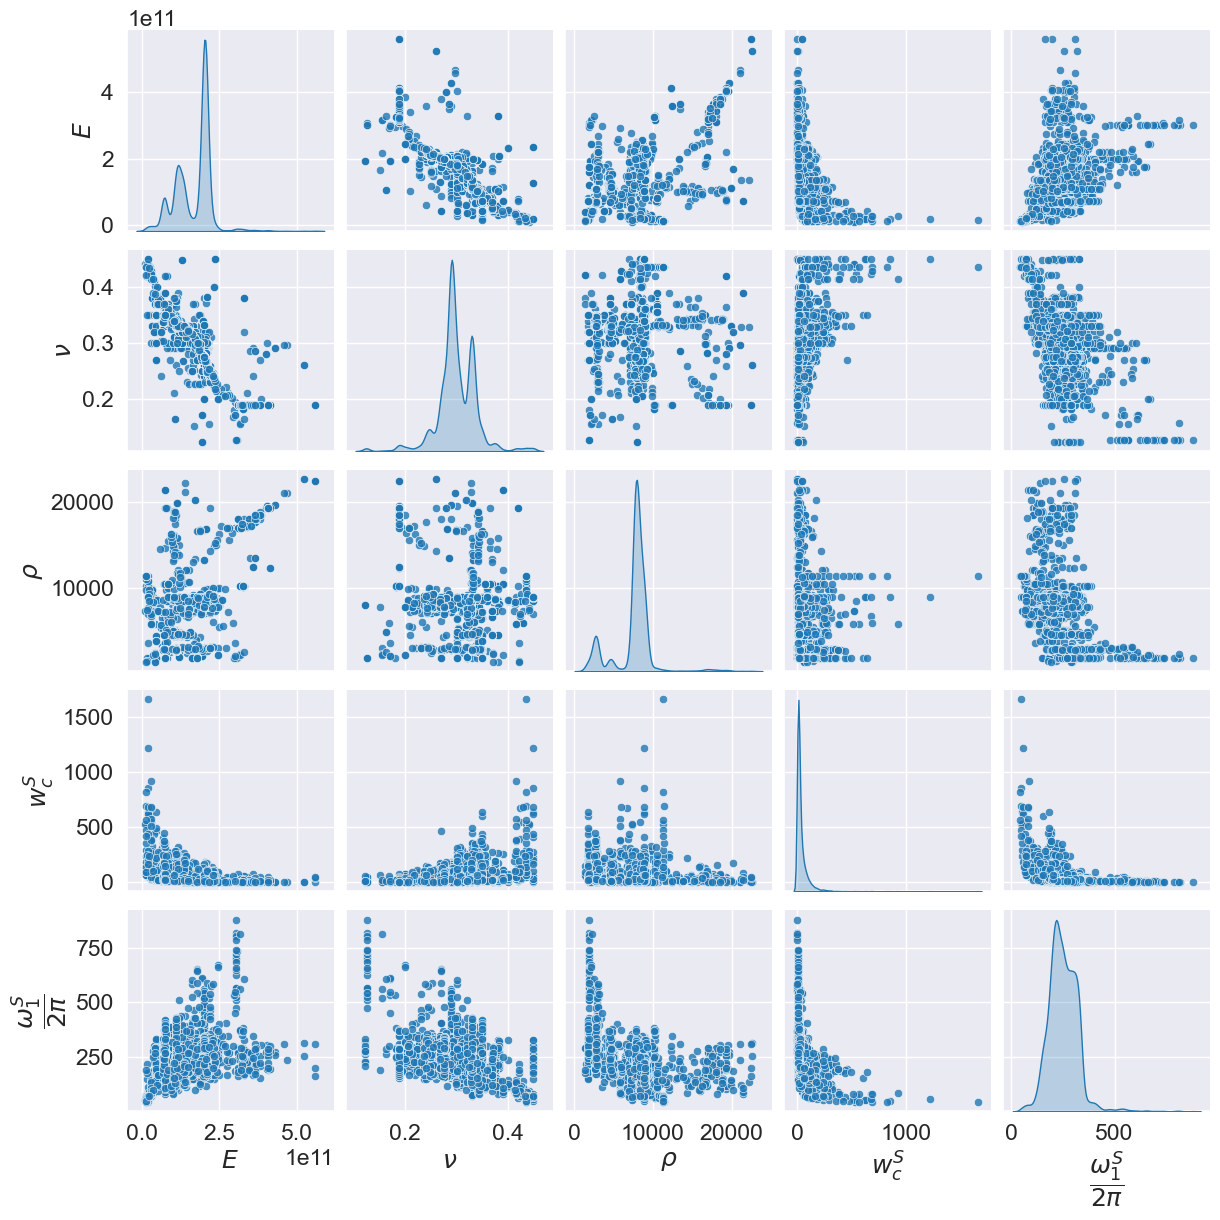

In [90]:
# Plot the pair plot
sns.set_context("notebook", font_scale=1.5) 
pair_plot = sns.pairplot(df[["$E$", "$\\nu$","$\\rho$","$w_{c}^{S}$", "$\\dfrac{\\omega_{1}^{S}}{2\\pi}$"]], markers='o', diag_kind='kde', plot_kws={'alpha':0.8})
# Customize the tick labels size
# plt.tick_params(axis='both', which='major', labelsize=74)

# # Adjust the font size for the x-axis and y-axis numbers
# for ax in pair_plot.axes.flatten():
#     ax.tick_params(axis='both', which='major', labelsize=19) 

plt.savefig('results/scatter_plots.png', bbox_inches='tight')
plt.show()

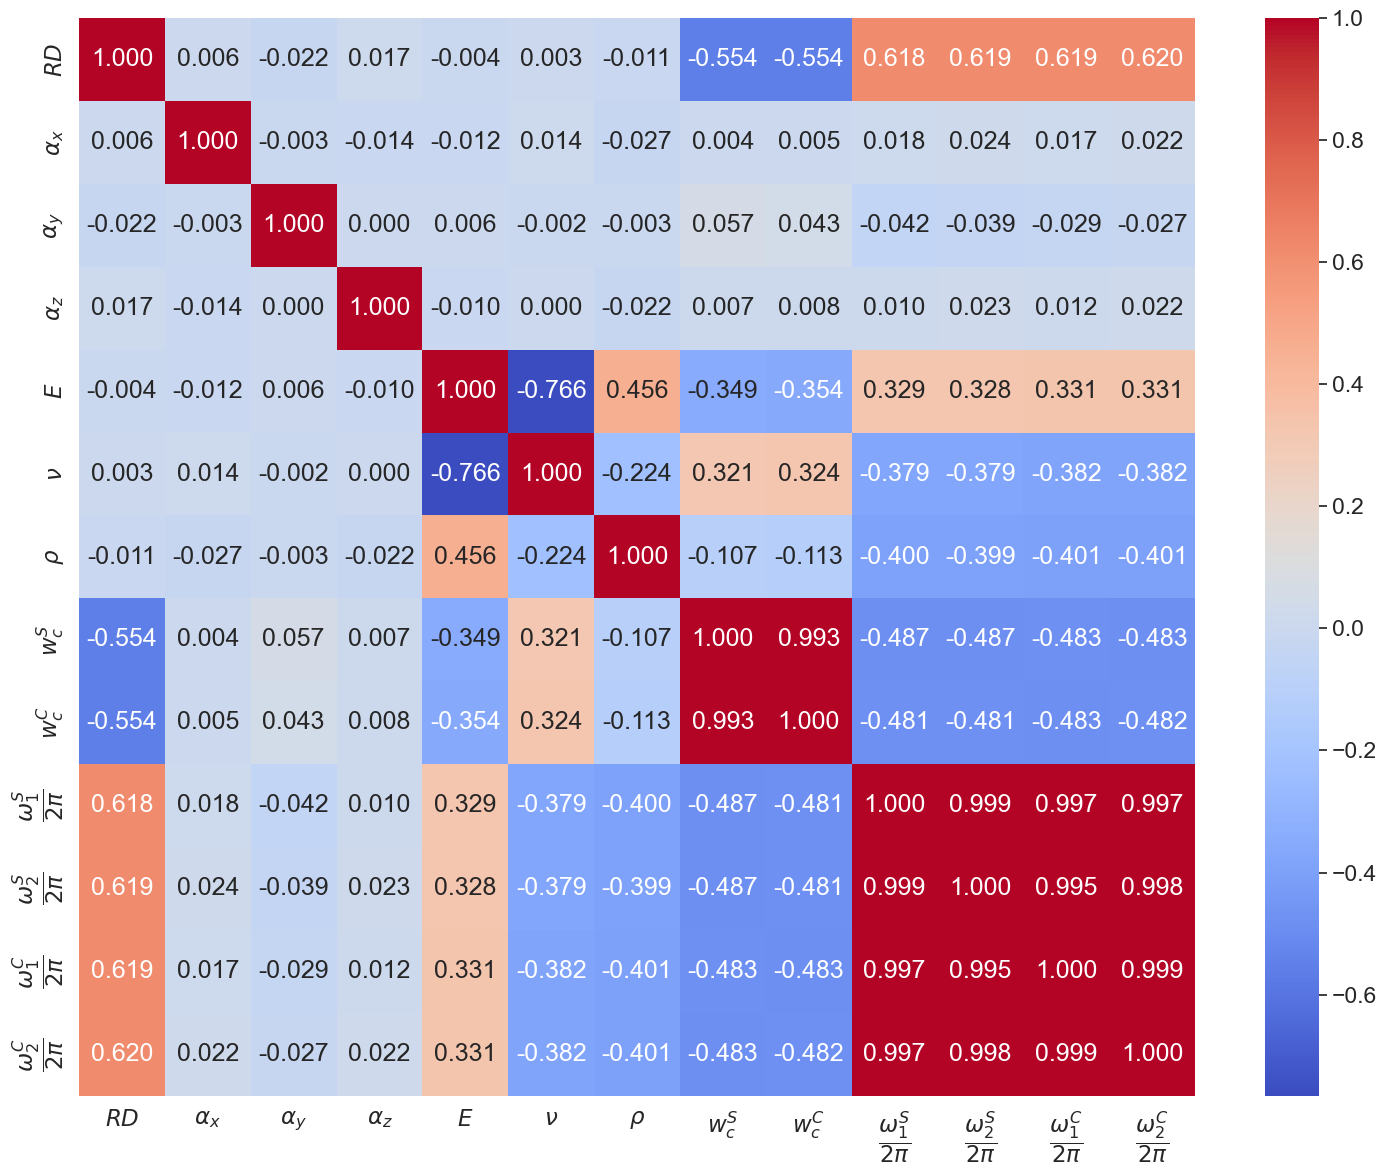

In [101]:
# Calculate correlation matrix
corr = df.corr()
sns.set_context("notebook", font_scale=1.5) 
# Plot the heatmap
ax = plt.figure(figsize=(18, 14))
heatmap = sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.3f')
plt.show()
ax.savefig('corr.png')

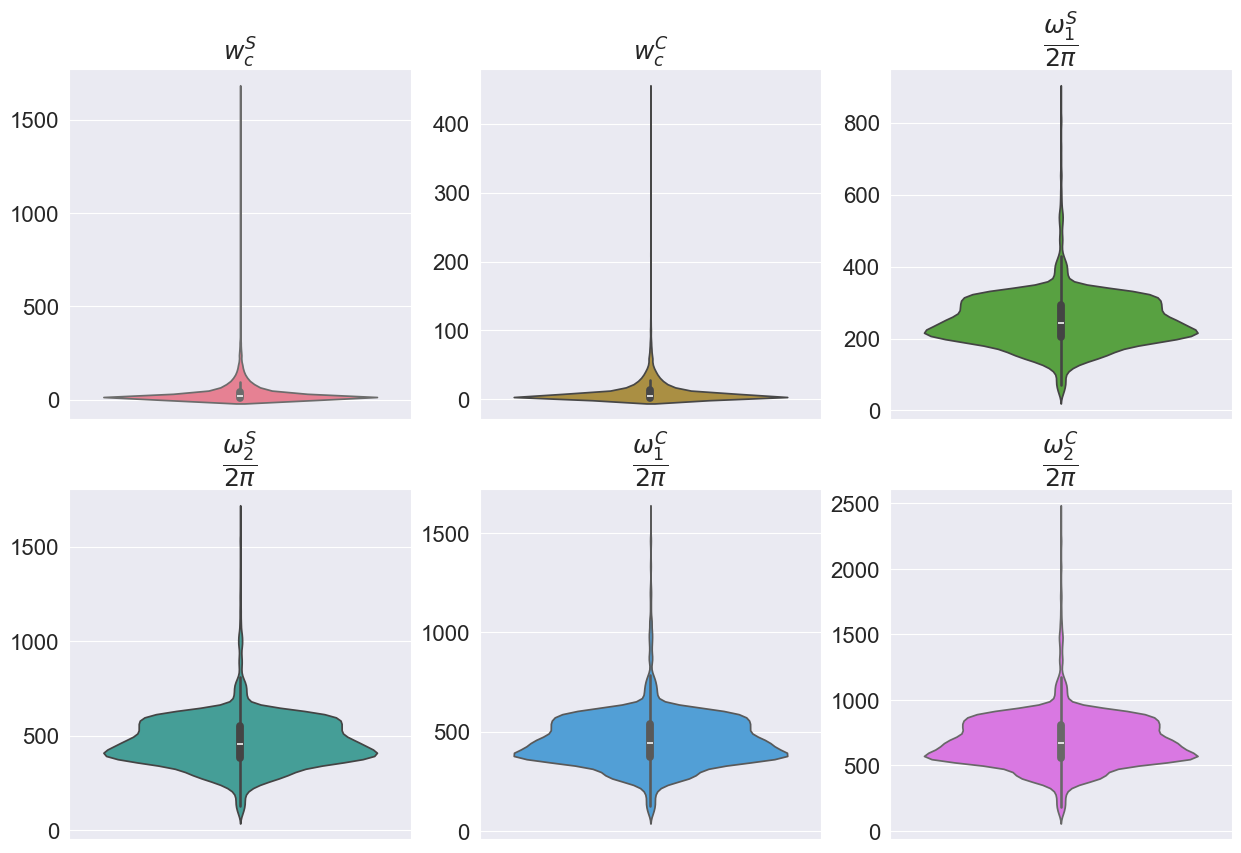

In [4]:
# Custom color palette
colors = sns.color_palette("husl", 6)

# List of variables to plot
variables = ['$w_{c}^{S}$', '$w_{c}^{C}$', '$\\dfrac{\\omega_{1}^{S}}{2\\pi}$', '$\\dfrac{\\omega_{2}^{S}}{2\\pi}$', '$\\dfrac{\\omega_{1}^{C}}{2\\pi}$', '$\\dfrac{\\omega_{2}^{C}}{2\\pi}$']

# Create a figure and axes
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Adjust the number of rows and columns as needed

# Plotting each variable
for i, var in enumerate(variables):
    row = i // 3
    col = i % 3
    sns.violinplot(y=df[var], ax=axes[row, col], color=colors[i])
    axes[row, col].set_title(var, fontsize=18)  # Increase title font size
    axes[row, col].tick_params(axis='y', labelsize=16)  # Increase y-ticks font size
    axes[row, col].tick_params(axis='x', labelsize=16)  # Increase x-ticks font size
    axes[row, col].set_ylabel('')  # Remove y-axis label if needed

# Save the figure
plt.savefig('sdasdasdsa.png')

# Show the plot
plt.show()

# The role of rotation variables

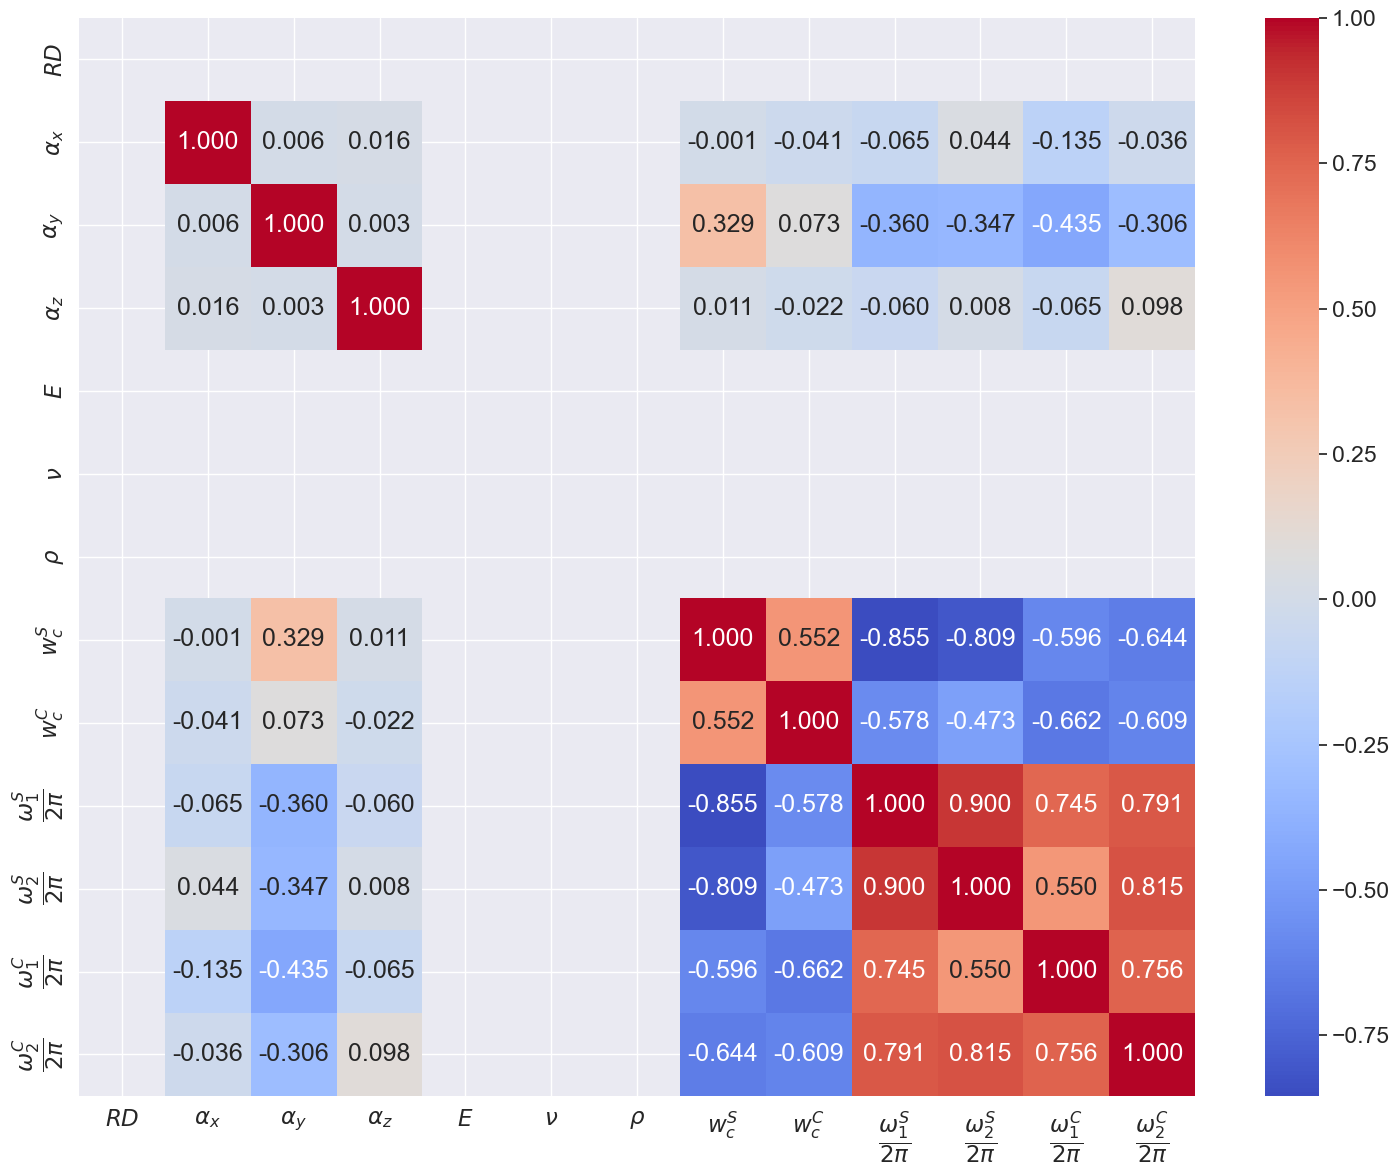

In [103]:
check_corr_rotation = pd.read_excel('datasets/predict_check_corr_rotation.xlsx')

data_check_corr_rotation = {
    "$RD$": check_corr_rotation['Input_5'],
    "$\\alpha_{x}$": check_corr_rotation['Input_6'],
    "$\\alpha_{y}$": check_corr_rotation['Input_7'],
    "$\\alpha_{z}$": check_corr_rotation['Input_8'],
    "$E$": check_corr_rotation['Input_9_1'],
    "$\\nu$": check_corr_rotation['Input_9_2'],
    "$\\rho$": check_corr_rotation['Input_9_3'],
    "$w_{c}^{S}$": check_corr_rotation['Output_1'],
    "$w_{c}^{C}$": check_corr_rotation['Output_2'],
    "$\\dfrac{\\omega_{1}^{S}}{2\\pi}$": check_corr_rotation['Output_3'],
    "$\\dfrac{\\omega_{2}^{S}}{2\\pi}$": check_corr_rotation['Output_4'],
    "$\\dfrac{\\omega_{1}^{C}}{2\\pi}$": check_corr_rotation['Output_5'],
    "$\\dfrac{\omega_{2}^{C}}{2\\pi}$": check_corr_rotation['Output_6'],
}   

# Creating a DataFrame
df_check_corr_rotation = pd.DataFrame(data_check_corr_rotation)

# Calculate correlation matrix
corr_check = df_check_corr_rotation.corr()

# Plot the heatmap
ax = plt.figure(figsize=(18, 14))
heatmap = sns.heatmap(corr_check, annot=True, cmap='coolwarm', fmt='.3f')
plt.show()
# ax.savefig('results/check_corr.png')

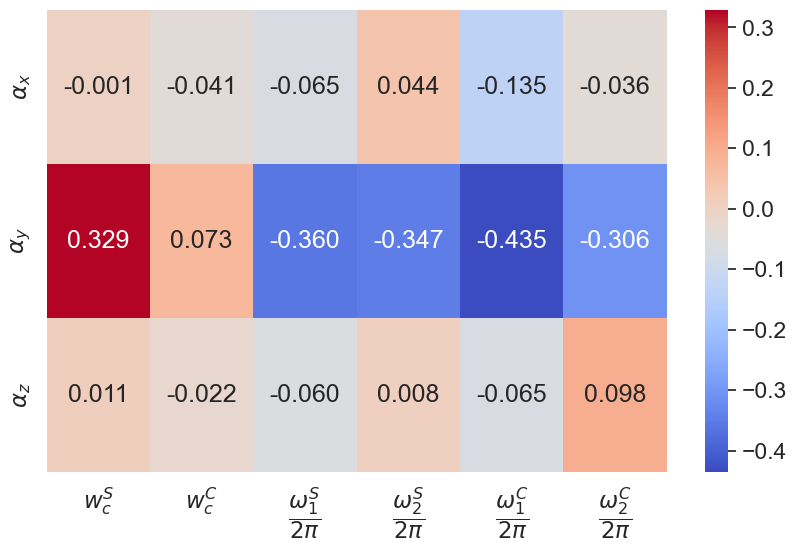

In [104]:
replot_data = np.array([
    [-0.001, -0.041, -0.065, 0.044, -0.135, -0.036],
    [0.329, 0.073, -0.36, -0.347, -0.435, -0.306],
    [0.011, -0.022, -0.06, 0.008, -0.065, 0.098]
])
labels_replot_data = [
    r'$w_{c}^{S}$', r'$w_{c}^{C}$', r'$\dfrac{\omega_{1}^{S}}{2\pi}$', 
    r'$\dfrac{\omega_{2}^{S}}{2\pi}$', r'$\dfrac{\omega_{1}^{C}}{2\pi}$', 
    r'$\dfrac{\omega_{2}^{C}}{2\pi}$', r'$\alpha_{x}$', r'$\alpha_{y}$', r'$\alpha_{z}$'
]
df_replot_data = pd.DataFrame(replot_data, columns=labels_replot_data[:6], index=labels_replot_data[6:])
ax = plt.figure(figsize=(10, 6))
sns.heatmap(df_replot_data, annot=True, cmap='coolwarm',fmt='.3f')
plt.show()
ax.savefig('results/check_corr.png')